***Aditya Rameshwar Pachpille***

***Suven Consultants Intership***

Performing Analysis of Meteorological Data

# Data Cleaning
Import libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load and Read Dataset

In [ ]:
data=pd.read_csv("/content/weatherHistory.csv")
data.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


Dimensions of the dataframe

In [ ]:
data.shape

(6217, 12)

Datatypes of the dataframe

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            6217 non-null   object 
 1   Summary                   6217 non-null   object 
 2   Precip Type               6217 non-null   object 
 3   Temperature (C)           6217 non-null   float64
 4   Apparent Temperature (C)  6217 non-null   float64
 5   Humidity                  6217 non-null   float64
 6   Wind Speed (km/h)         6217 non-null   float64
 7   Wind Bearing (degrees)    6217 non-null   float64
 8   Visibility (km)           6217 non-null   float64
 9   Loud Cover                6216 non-null   float64
 10  Pressure (millibars)      6216 non-null   float64
 11  Daily Summary             6216 non-null   object 
dtypes: float64(8), object(4)
memory usage: 583.0+ KB


Statistical details of the dataframe


In [ ]:

data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6216.0,6216.000000
mean,10.500130,9.284693,0.776707,9.984926,190.824835,9.566518,0.0,997.989355
std,10.519172,11.868025,0.173307,6.491972,106.467338,4.020271,0.0,142.656998
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.161111,-1.277778,0.670000,4.878300,126.000000,7.277200,0.0,1012.130000
50%,10.911111,10.911111,0.830000,9.080400,191.000000,9.982000,0.0,1016.770000
75%,18.833333,18.833333,0.920000,13.363000,287.000000,11.270000,0.0,1022.270000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,0.0,1045.140000


Handling missing values

In [ ]:
#Check for missing values
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  1
Pressure (millibars)        1
Daily Summary               1
dtype: int64

Dataframe columns
We only need 3 columns for our task which is data['Formatted Date','Apperent Temperature(c)','Humidity']

In [ ]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

Drop unwanted columns

In [ ]:
data['Loud Cover'].unique()

array([ 0., nan])

In [ ]:
data = data.drop(['Loud Cover'], axis = 1)

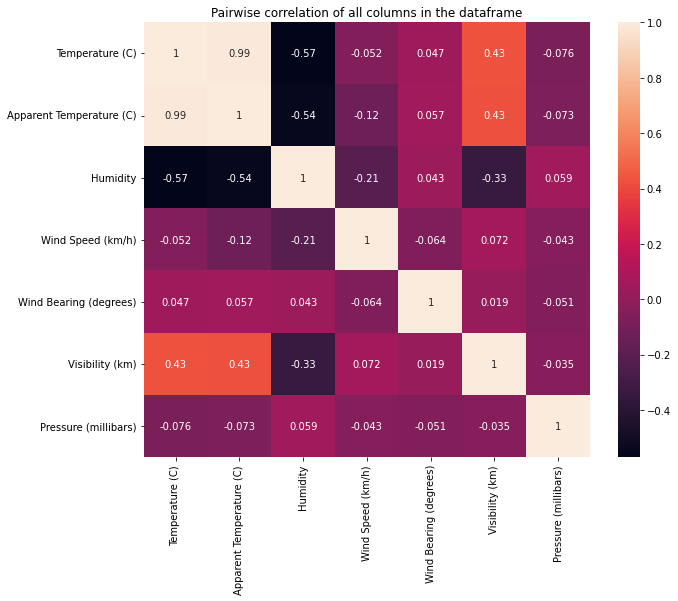

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data= data.corr(), annot=True)
plt.title("Pairwise correlation of all columns in the dataframe")
# save the figure
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')
plt.show()

Changing Formatted Date from String to Datetime

In [ ]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            6217 non-null   datetime64[ns, UTC]
 1   Summary                   6217 non-null   object             
 2   Precip Type               6217 non-null   object             
 3   Temperature (C)           6217 non-null   float64            
 4   Apparent Temperature (C)  6217 non-null   float64            
 5   Humidity                  6217 non-null   float64            
 6   Wind Speed (km/h)         6217 non-null   float64            
 7   Wind Bearing (degrees)    6217 non-null   float64            
 8   Visibility (km)           6217 non-null   float64            
 9   Pressure (millibars)      6216 non-null   float64            
 10  Daily Summary             6216 non-null   object             
dtypes: datetime64[ns,

Number of Distinct Observation


In [ ]:
data.nunique()

Formatted Date              6217
Summary                       14
Precip Type                    2
Temperature (C)             3070
Apparent Temperature (C)    3684
Humidity                      74
Wind Speed (km/h)           1452
Wind Bearing (degrees)       357
Visibility (km)              594
Pressure (millibars)        2654
Daily Summary                 58
dtype: int64

In [ ]:
data = data.set_index("Formatted Date")
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2006-05-23 19:00:00+00:00,Mostly Cloudy,rain,22.238889,22.238889,0.72,10.8997,10.0,9.9820,1015.40,Partly cloudy until night.
2006-05-23 20:00:00+00:00,Mostly Cloudy,rain,22.172222,22.172222,0.66,13.9748,40.0,15.8263,1015.73,Partly cloudy until night.
2006-05-23 21:00:00+00:00,Mostly Cloudy,rain,21.350000,21.350000,0.67,9.3702,46.0,14.9569,1016.04,Partly cloudy until night.


By Resampling, Create new DataFrame only for Apparent Temperature and Humidity

In [ ]:
df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = data[df_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


Exploratory Data Analysi

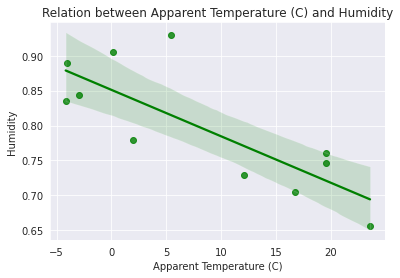

In [ ]:
sns.set_style("darkgrid")
sns.regplot(data=df_monthly_mean, x="Apparent Temperature (C)", y="Humidity", color="g")
plt.title("Relation between Apparent Temperature (C) and Humidity")
# save the figure
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

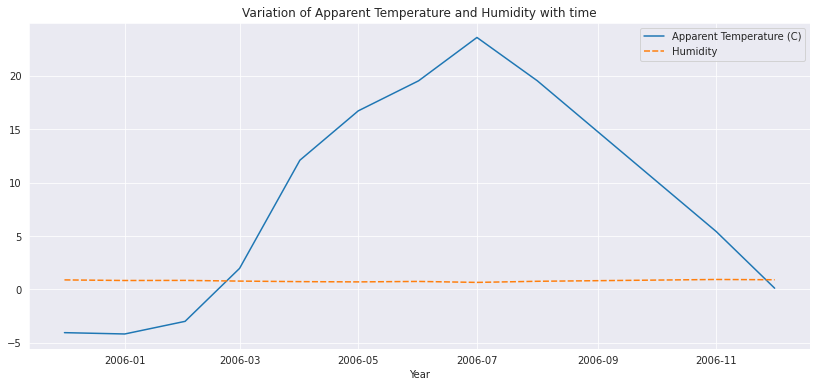

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data = df_monthly_mean)
plt.xlabel('Year')
plt.title("Variation of Apparent Temperature and Humidity with time")
# save the figure
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()

Observation:
From the above plot,

"Humidity" remained constant from 2006 - 2016
"Apparent Temperature (C)" frequently changed from 2006 - 2016



Pair plot for correlation of Apparent temperature & Humidity

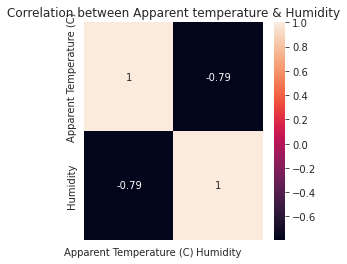

In [ ]:
# Pair plot for correlation of Apparent temperature & Humidity
sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.title("Correlation between Apparent temperature & Humidity")
sns.heatmap(data= df_monthly_mean.corr(), annot=True)
# save the figure
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
plt.show()

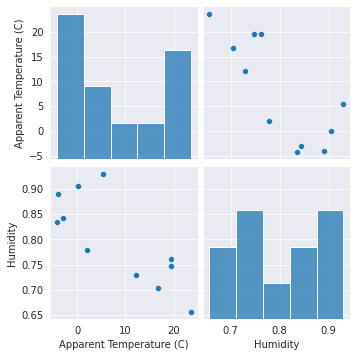

In [ ]:
sns.pairplot(df_monthly_mean, kind='scatter')
# save the figure
plt.savefig('plot8.png', dpi=300, bbox_inches='tight')
plt.show()

2D Scatter Plot with Color Coding for each Summary type

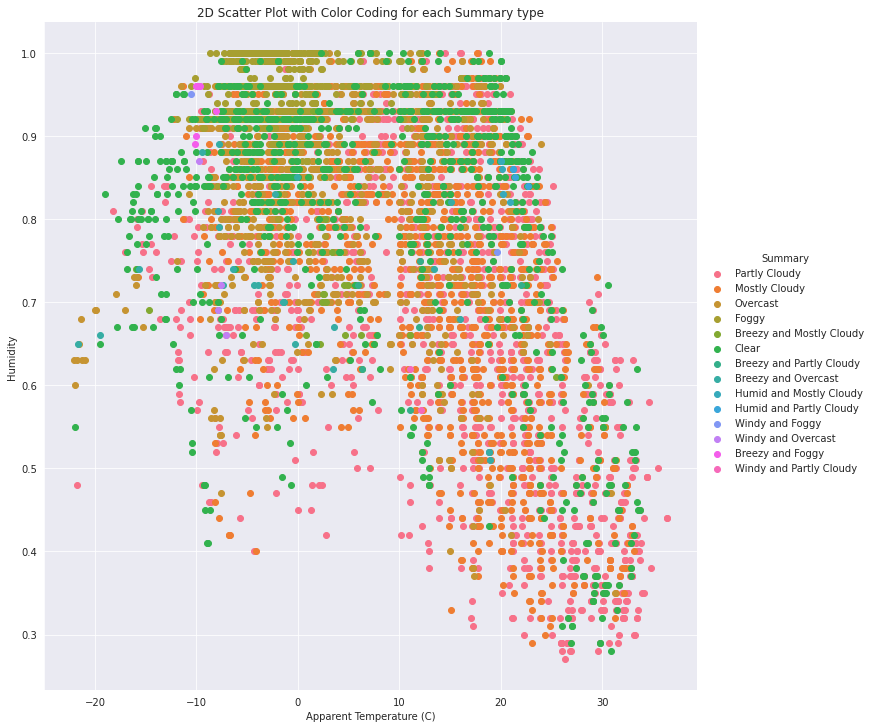

In [ ]:
sns.set_style("darkgrid")
sns.FacetGrid(data, hue="Summary", height=10).map(plt.scatter, "Apparent Temperature (C)", "Humidity").add_legend()
plt.title("2D Scatter Plot with Color Coding for each Summary type")
# save the figure
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()

Observation:

There are very few outlier.
Mostly Weather is Clear or Partly Cloudy/Rain in Finland.
Only few days there has a Light Rain or Dry or Dangerously Windy and Partly Cloudy.

Univariate Analysis

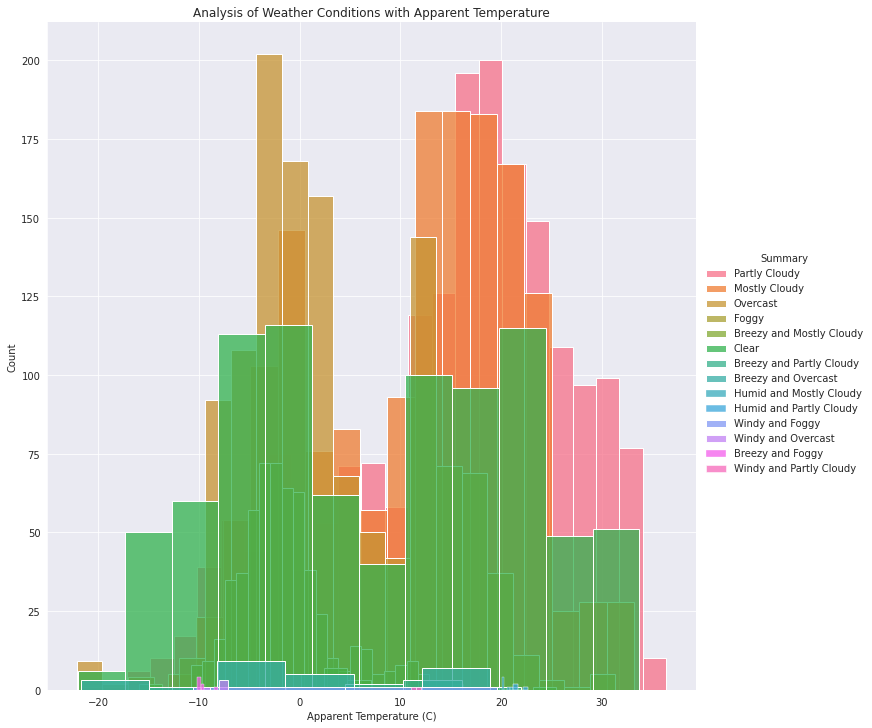

In [ ]:
# For Apparent Temperature (C)
sns.set_style("darkgrid")
sns.FacetGrid(data, hue="Summary", height=10).map(sns.histplot, "Apparent Temperature (C)").add_legend()
plt.title("Analysis of Weather Conditions with Apparent Temperature")
# save the figure
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')
plt.show()

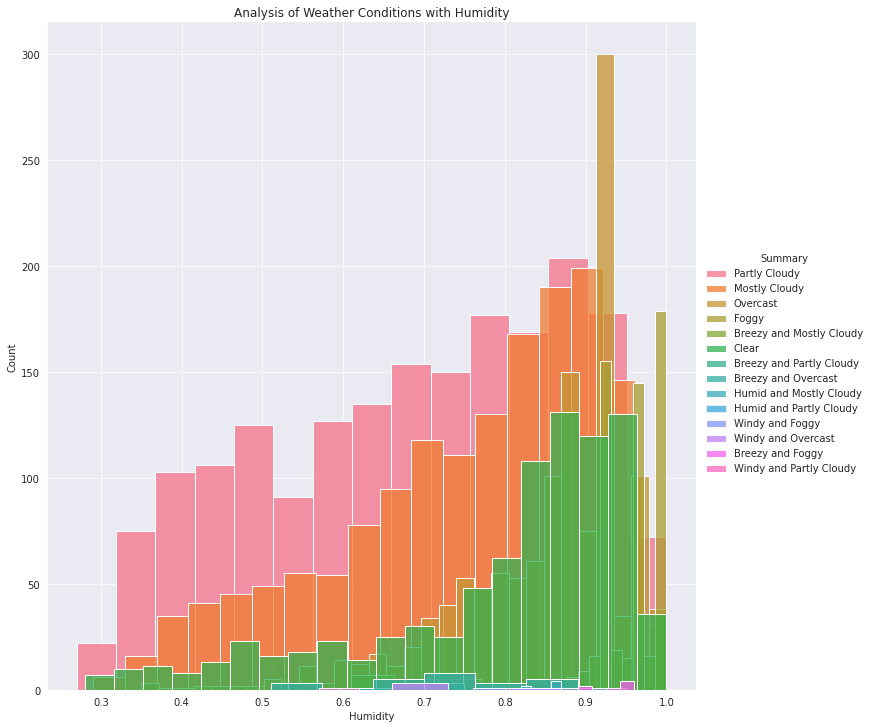

In [ ]:
# For Humidity
sns.set_style("darkgrid")
sns.FacetGrid(data, hue="Summary",height=10).map(sns.histplot, "Humidity").add_legend()
plt.title("Analysis of Weather Conditions with Humidity")
# save the figure
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')
plt.show()

Observation: "Humidity" is better Feature than "Apparent Temperature (C)"

**Function for plotting Humidity & Apparent Temperature for all months**

In [ ]:
# Function for plotting Humidity & Apparent Temperature for all month
TEMP_DATA = df_monthly_mean.iloc[:,0]
HUM_DATA = df_monthly_mean.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'
def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.savefig('plot10.png', dpi=300, bbox_inches='tight') 
    #plt.savefig('plot11.png', dpi=300, bbox_inches='tight')  
    plt.show()

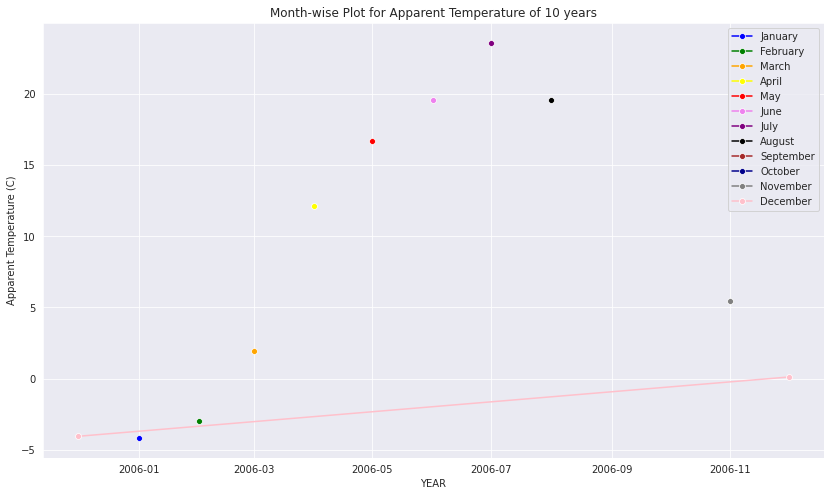

In [ ]:
# Month-wise Plot for Apparent Temperature of 10 years 
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, TEMP_DATA)

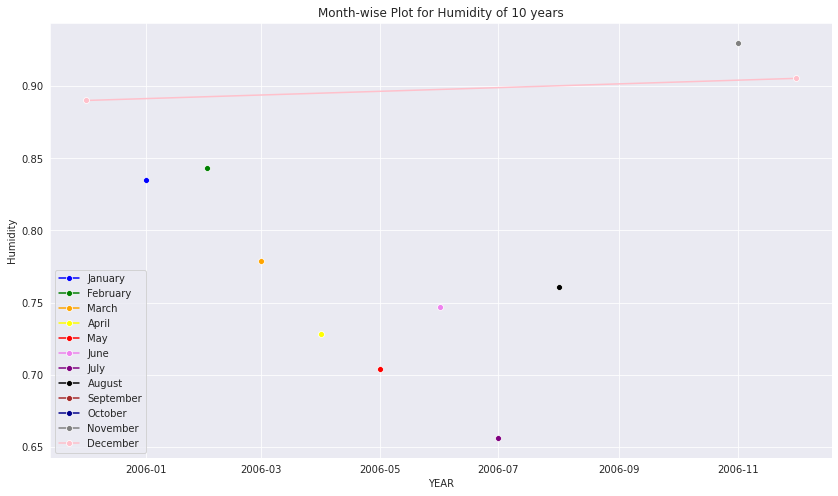

In [ ]:
# Month-wise Plot for Humidity of 10 years 
title = 'Month-wise Plot for Humidity of 10 years' 
sns_plot(title, HUM_DATA)

In [ ]:
# Function for plotting Apparent Temperature & Humidity for each month
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature Vs Humidity for {}'.format(label))
    plt.xlabel('YEAR')
    data = df_monthly_mean[df_monthly_mean.index.month == month]
    sns.lineplot(data=data, marker='o')
    name="month"+str(month)+".png"
    plt.savefig(name, dpi=300, bbox_inches='tight')  
    plt.show()
    print('-'*80)

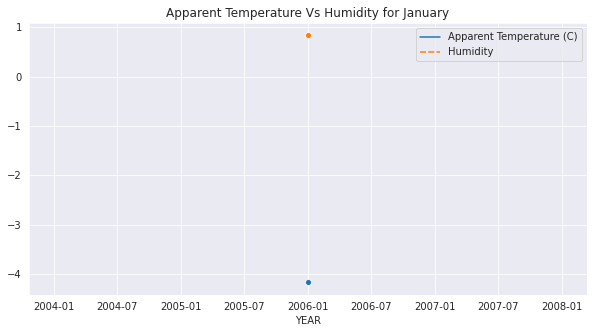

--------------------------------------------------------------------------------


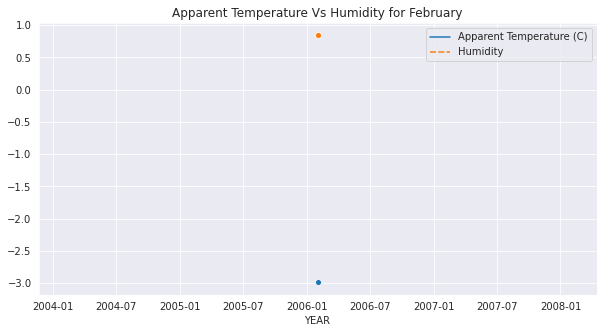

--------------------------------------------------------------------------------


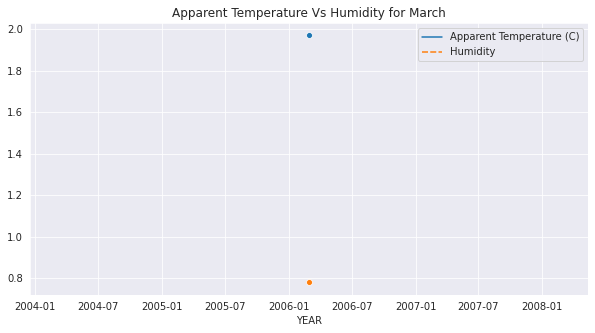

--------------------------------------------------------------------------------


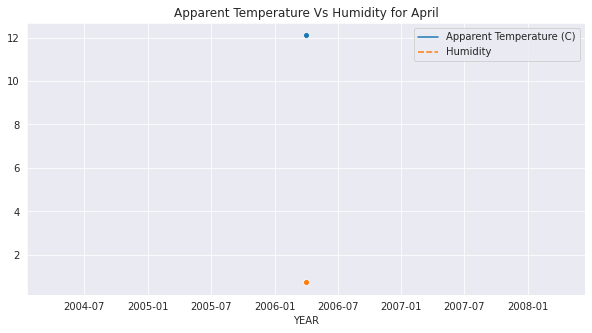

--------------------------------------------------------------------------------


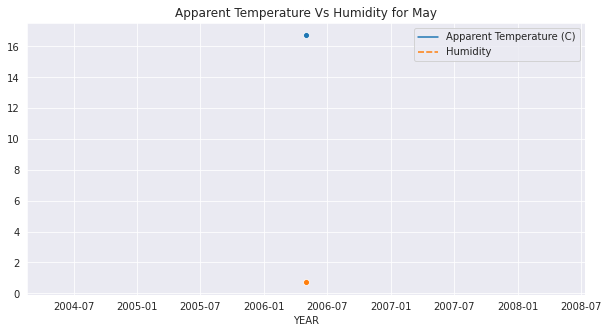

--------------------------------------------------------------------------------


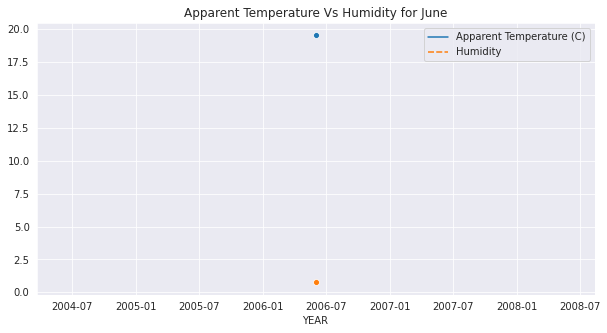

--------------------------------------------------------------------------------


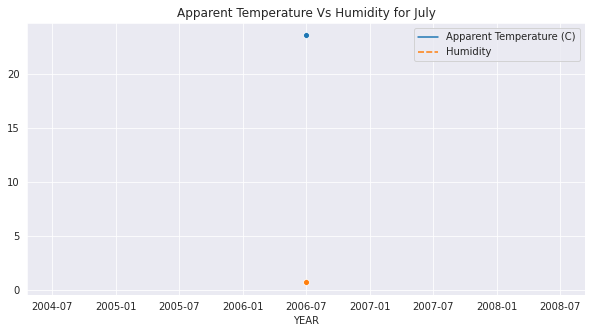

--------------------------------------------------------------------------------


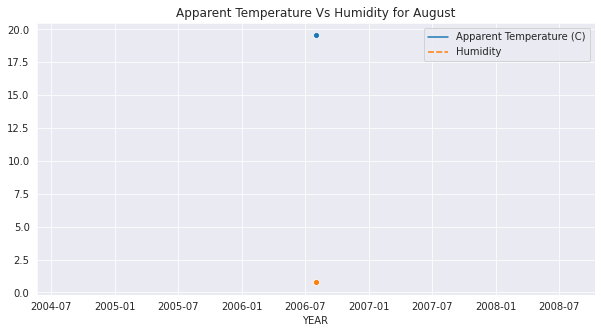

--------------------------------------------------------------------------------


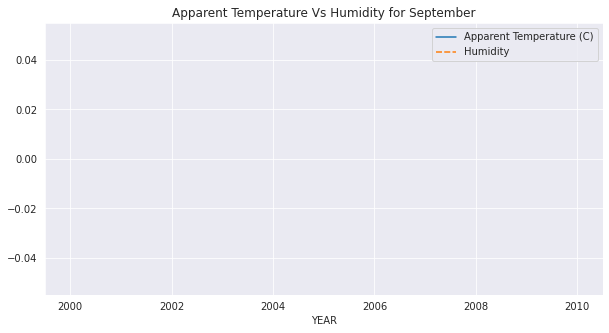

--------------------------------------------------------------------------------


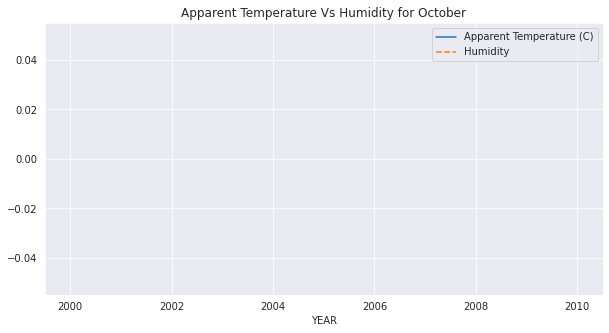

--------------------------------------------------------------------------------


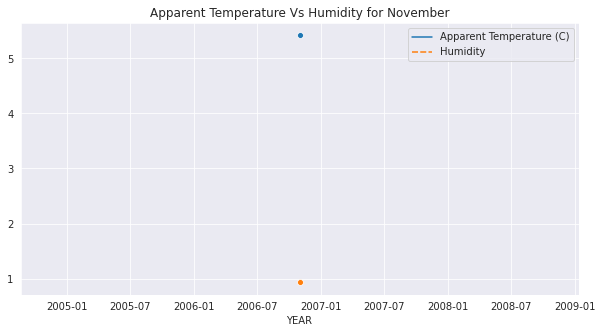

--------------------------------------------------------------------------------


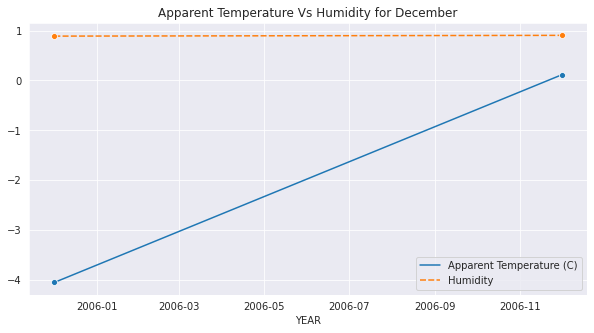

--------------------------------------------------------------------------------


In [ ]:
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)

Conclusion:

As we can see in the above images, there are many ups and downs in the temperature and the average humidity has remained constant throughout the 10 years.So, We can conclude that global warming has caused an uncertainty in the temperature over the past 10 years.